# Assignment 2: Privacy-Preserving Data Sharing
### Security and Privacy Project - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [ ]:
!pip install sdv

### Load dataset

In [23]:
from sdv.demo import load_tabular_demo
import pandas as pd

data = pd.read_csv('data/infringement_dataset_v2.csv')
data.head()


loan_id  infringed    contract_type gender has_own_car has_own_realty  \
0   100002          1       Cash loans      M           N              Y   
1   100003          0       Cash loans      F           N              N   
2   100004          0  Revolving loans      M           Y              Y   
3   100006          0       Cash loans      F           N              Y   
4   100007          0       Cash loans      M           N              Y   

   num_children  annual_income  credit_amount  credit_annuity  ...  \
0             0       202500.0       406597.5         24700.5  ...   
1             0       270000.0      1293502.5         35698.5  ...   
2             0        67500.0       135000.0          6750.0  ...   
3             0       135000.0       312682.5         29686.5  ...   
4             0       121500.0       513000.0         21865.5  ...   

   first_name  last_name past_avg_amount_annuity past_avg_amt_application  \
0      Robert    Watkins                9251.775                179055.00   
1        Jane    Navarro               56553.990                435436.50   
2       David  Seagraves                5357.250                 24282.00   
3     Deborah      Tandy               23651.175                272203.26   
4       David     Walker               12278.805                150530.25   

  past_avg_amt_credit  past_loans_approved  past_loans_refused  \
0           179055.00                  1.0                 0.0   
1           484191.00                  3.0                 0.0   
2            20106.00                  1.0                 0.0   
3           291695.50                  5.0                 3.0   
4           166638.75                  6.0                 0.0   

   past_loans_canceled  past_loans_unused  past_loans_total  
0                  0.0                0.0               1.0  
1                  0.0                0.0               3.0  
2                  0.0                0.0               1.0  
3                  1.0                0.0               9.0  
4                  0.0                0.0               6.0  

[5 rows x 46 columns]

### Fit GaussianCopula to the data (train the model)

In [59]:
import warnings
warnings.filterwarnings('ignore')

from sdv.tabular import GaussianCopula

model = GaussianCopula(
                    primary_key='loan_id', 
                    anonymize_fields={
                        'loan_id': 'loan_id',
                        'first_name': 'first_name',
                        'last_name': 'last_name'
                    })
model.fit(data)


### Create synthetic samples using the trained model

In [61]:
new_data = model.sample(num_rows=307511)
new_data.head(5)

new_data.to_csv("data/Synthetic_data.csv", index=False)

### Evaluate synthetic data

In [62]:
from sdv.evaluation import evaluate
overall_score = evaluate(new_data, data)
overall_score

0.8635567324516418

### Quality report

In [63]:
from sdmetrics.reports.single_table import QualityReport
my_report = QualityReport()
my_report.generate(data, new_data, model.get_metadata().to_dict())


Creating report: 100%|██████████| 4/4 [25:13<00:00, 378.45s/it]



Overall Quality Score: 86.92%

Properties:
Column Shapes: 84.96%
Column Pair Trends: 88.87%


### Column comparison

In [64]:
my_report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0                  infringed  KSComplement       0.980619
1               num_children  KSComplement       0.751684
2              annual_income  KSComplement       0.677494
3              credit_amount  KSComplement       0.858203
4             credit_annuity  KSComplement       0.937471
5            goods_valuation  KSComplement       0.864631
6                        age  KSComplement       0.977071
7              days_employed  KSComplement       0.261158
8                    car_age  KSComplement       0.914369
9       provided_mobilephone  KSComplement       0.999997
10        provided_workphone  KSComplement       0.899691
11        provided_homephone  KSComplement       0.895906
12     mobilephone_reachable  KSComplement       0.998133
13            provided_email  KSComplement       0.989542
14        num_family_members  KSComplement       0.954774
15             region_rating  KSComplement       0.930474
16               score_ext_1  KSComplement       0.857435
17               score_ext_2  KSComplement       0.923881
18               score_ext_3  KSComplement       0.934617
19       num_req_bureau_hour  KSComplement       0.993887
20        num_req_bureau_day  KSComplement       0.994402
21       num_req_bureau_week  KSComplement       0.971044
22      num_req_bureau_month  KSComplement       0.561122
23        num_req_bureau_qrt  KSComplement       0.489148
24       num_req_bureau_year  KSComplement       0.896877
25   past_avg_amount_annuity  KSComplement       0.898138
26  past_avg_amt_application  KSComplement       0.857264
27       past_avg_amt_credit  KSComplement       0.863424
28       past_loans_approved  KSComplement       0.918376
29        past_loans_refused  KSComplement       0.598919
30       past_loans_canceled  KSComplement       0.551822
31         past_loans_unused  KSComplement       0.924753
32          past_loans_total  KSComplement       0.874287
33             contract_type  TVComplement       0.921860
34                    gender  TVComplement       0.911987
35               has_own_car  TVComplement       0.958245
36            has_own_realty  TVComplement       0.962183
37               income_type  TVComplement       0.907727
38                 education  TVComplement       0.942015
39             family_status  TVComplement       0.955790
40              housing_type  TVComplement       0.920380
41           occupation_type  TVComplement       0.850279
42         organization_type  TVComplement       0.829148
43                first_name  TVComplement       0.571749
44                 last_name  TVComplement       0.477765

### Correlation pairs

In [69]:
my_report.get_visualization(property_name='Column Pair Trends')

### Distribution comparison

In [66]:
from sdmetrics.reports.utils import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=new_data,
    metadata=model.get_metadata().to_dict(),
    column_name='age'
)

fig.show()

In [68]:
from sdmetrics.reports.utils import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=new_data,
    metadata=model.get_metadata().to_dict(),
    column_name='infringed'
)

fig.show()

### Analysis

In [73]:
aux = pd.read_csv('data/Synthetic_data.csv')
columns = ['age', 'past_avg_amount_annuity', 'past_avg_amt_application', 'past_avg_amt_credit', 'past_loans_total']
colunas = aux[columns]
groupby_age = colunas.groupby("age").mean()
display(groupby_age)

past_avg_amount_annuity  past_avg_amt_application  past_avg_amt_credit  \
age                                                                           
20              11375.723518             125801.235135        136341.295270   
21              12315.692806             135490.925448        148847.362064   
22              12476.718195             135553.600629        149373.879360   
23              12792.959396             142666.933281        157860.510812   
24              12757.517544             142146.267196        156131.312244   
25              12950.017715             146418.425081        161157.716459   
26              13025.523800             148221.473596        163816.649760   
27              13158.883184             149561.097222        164641.221059   
28              13191.384189             149657.026049        166026.212706   
29              13430.031595             152917.872406        169063.354485   
30              13519.129366             153371.716721        169131.824754   
31              13286.539360             153807.311128        169198.121089   
32              13569.482420             154813.681688        169274.883411   
33              13568.905018             156779.685265        172390.274106   
34              13575.570028             157141.855025        173605.829729   
35              13788.951906             159402.931232        176689.886478   
36              14205.110634             162913.752273        180306.075636   
37              14056.994661             161292.067771        178727.067129   
38              14179.593544             163012.930540        181034.240971   
39              14089.675980             163227.454489        180919.888319   
40              14515.665792             167910.938270        186376.886204   
41              14290.129227             166869.061489        184394.559391   
42              14339.462697             169413.060158        186997.874956   
43              14608.677473             171218.310456        188895.268680   
44              14605.671664             171440.211822        190193.453379   
45              14800.414162             174097.914444        193152.198991   
46              14682.576781             173230.754460        192330.742406   
47              14803.732834             175313.363503        194075.408573   
48              15000.197009             177685.902579        196976.294631   
49              14895.137414             174853.419401        194452.386979   
50              15085.528452             177793.093700        198369.778137   
51              15116.747774             180820.489752        200130.472492   
52              15189.326761             181314.777794        200646.583595   
53              15426.774762             184218.290549        204413.658915   
54              15322.918672             181829.447120        201875.772326   
55              15639.006229             186881.500968        208193.987086   
56              15318.139656             184804.602151        204937.198157   
57              15851.749110             189844.432150        209937.928996   
58              15712.603617             187420.793787        208150.607966   
59              15753.359881             192504.491073        212143.290271   
60              15907.231416             189676.050196        211741.070930   
61              15987.286857             192372.807976        216212.247349   
62              16108.737095             195660.085166        218383.987468   
63              16073.472379             196745.524966        219540.903411   
64              16404.989623             201640.711625        225823.366176   
65              16536.715810             203058.244496        225197.761420   
66              16691.751675             204146.900821        228087.534784   
67              17120.536842             209345.051041        233691.089869   
68              16866.174770             207689.334958 

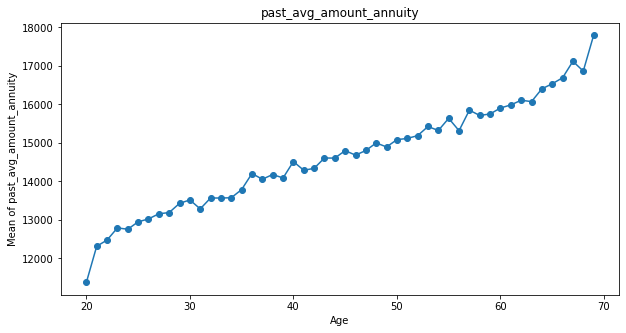

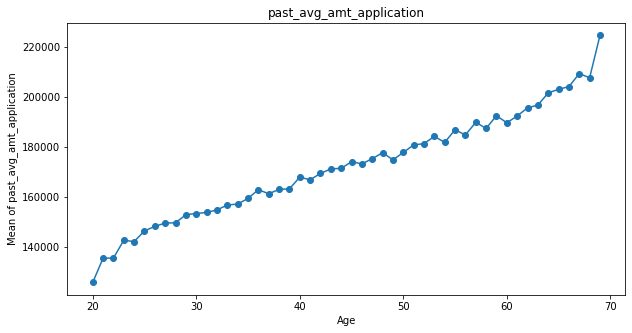

In [75]:
from matplotlib import pyplot as plt
import numpy as np
def plot(column, x, y):   
    plt.figure(figsize=(10,5))
    plt.title(column)
    plt.xlabel("Age")
    plt.ylabel("Mean of " + column)
    plt.plot(x, y)
    plt.scatter(x, y)

x = np.arange(20,70)
plot('past_avg_amount_annuity', x, groupby_age['past_avg_amount_annuity'])
plot('past_avg_amt_application', x, groupby_age['past_avg_amt_application'])
plot('past_avg_amt_credit', x, groupby_age['past_avg_amt_credit'])
plot('past_loans_total', x, groupby_age['past_loans_total'])

In [76]:
count_inf = aux[aux['infringed']==1.0].groupby(['age']).size()

age = aux.groupby(['age']).size()


plt.title("Percentagem de clientes com determinada idade com empréstimos em incumprimento")
plt.xlabel("Idade dos clientes")
plt.ylabel("Percentagem de empréstimos em incumprimento")

((count_inf/age)*100).plot(figsize=(30,10), kind='bar')

<AxesSubplot:title={'center':'Percentagem de clientes com determinada idade com empréstimos em incumprimento'}, xlabel='age', ylabel='Percentagem de empréstimos em incumprimento'>